Backpropagation is an algorithm to compute the gradient of the cost function $C$ of a neural network. Its main goal is therefore to obtain an expression of the partial derivatives $\frac {\partial C} {\partial w^l_{jk}}$ or $\frac {dC} {db^l_j}$. Not only is it an efficient algorithm, it also gives us some insight in the inner workings of a network.

# I. Notations and reformulations

## 1. Weights

We'll use $w^l_{jk}$ to denote the weight for the connection from the $k^{th}$ neuron in the $(l−1)^{th}$ layer to the $j^{th}$ neuron in the $l^{th}$ layer.

* $k$ denotes the **input neuron**
* $j$ denotes the **output neuron**
* $l$ denotes the **output layer**

Remember: $w_{output - input} ^{layer}$. This may seem counterintuitive, but it allows the algebra to work out seamlessly.

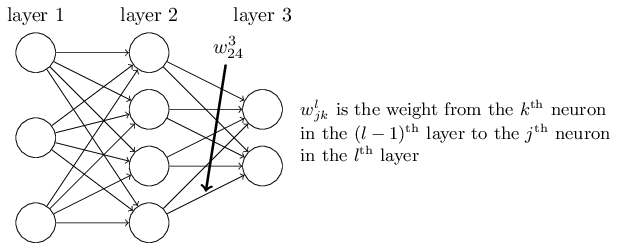

## 2. Bias & Activation

* $b^l_j$  is the bias of the $j^{th}$ neuron in the $l^{th}$ layer. 
* $a^l_j$  is the activation of the $j^{th}$ neuron in the $l^{th}$ layer.

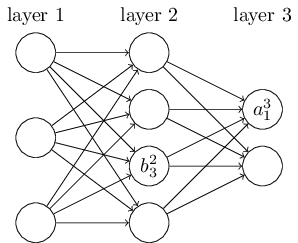

## 3. A fast matrix-based approach to computing the output from a neural network 

Formula for the activation of an **individual neuron**: the $j^{th}$ neuron in layer $l$.

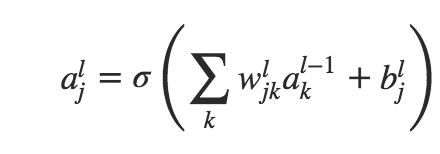

Formula for the vector of activations of all the neurons in one particular layer: layer $l$.

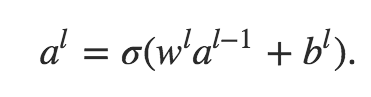


## 4. Hadamard (or Schur) product

It's the elementwise product of two matrices, written $\odot$:

$$[a \odot b]_{ij} = a_{ij} \times b_{ij}$$

Both matrices need to have the same dimensions for the product to make sense. It's easy to see that the Hadamard product of two vectors $a$ and $b$ can be rewritten as the product $Ma$ of $a$ by a diagonal matrix $M$ defined by $M_{ii} = b_i$, and vice-versa. Taking this point of view leads to slightly different equations.

# II. Backprop

Our goal here is to compute the partial derivatives $\frac {\partial C} {\partial w_{jk}^l}$ and $\frac {\partial C} {\partial b_{j}^l}$.


## 1. Two assumptions about the cost function

* Needs to be average of costs over all the training inputs: $C = \frac 1 n \sum_x C_x$. From here on we'll focus on $C_x$ and write $C$ for $C_x$. 
* Cost needs to be a function of outputs of the neural network

## 2. Error of a neuron 

In order to compute the gradient, it's useful to define an additional quantity for every neuron, called the error of the neuron. $\delta ^l_j$ stands for the error of the $j^{th}$ neuron in layer $l$. It's defined as:

$$\delta^l_j = \frac{\partial C} {\partial z^l_j}$$

where $z^l_j = [w^l \times a^l + b^l]_j$ is the weighted input of the neuron.

## 3. Four fundamental equations 

* **First equation** (BP1): error in the output layer.

For an individual neuron:
$$\delta^L_j = \frac {\partial C} {\partial a^L_j} \times \sigma '(z^L_j)$$
Equivalently, for the whole output layer:
$$\boxed {\delta^L = \nabla _a C \odot \sigma '(z^L)}$$


* **Second equation** (BP2): error in layer $l$ as a function of the error in layer $l + 1$

This is clearer when written for a layer as a whole:
$$\boxed{\delta^l = [(w^{l+1})^T \times \delta^{l+1}] \odot \sigma'(z^l)}$$

Together, (BP1) and (BP2) allow us to compute (by induction) the **error in all the layers**.

* **Third equation** (BP3): rate of change of the cost with respect to the bias of a neuron

$$\boxed{   \frac {\partial C} {\partial b^l_j} = \delta^l_j    }$$

* **Fourth equation** (BP4): rate of change of the cost with respect to the weight of a connection

$$\boxed{   \frac {\partial C} {\partial w^l_jk} = a^{l-1}_k  \delta^l_j    }$$


Once we know the errors, (BP3) and (BP4) give us the **rates of changes of the cost** with respect to all weights and biases, allowing us to **update these parameters** during SGD. All these equations are easy to prove using the chain rule.

## 4. The backpropagation algorithm in pseudo-code

1. **Input**: use the input vector to compute the activation vector for the first layer, $a^1$. 
2. **Feedforward**: for layers $l = 2, 3, ..., L$, calculate the activation vectors $a^l$ using the formula: $a^l = \sigma(w^l a^{l-1} + b^l)$
3. **Output error**: use (BP1) to find the error $\delta^L$ in the output layer: $\delta^L = \nabla_a C \odot \sigma'(z^L)$
4. **Error backpropagation**: for layers $l = L$ to $l = 2$, use (BP2) to obtain the error in each layer, $\delta^l = [(w^{l+1})^T \times \delta^{l+1}] \odot \sigma'(z^l)$
5. **Gradients**: use (BP3) and (BP4) to get the partial derivatives needed to update weights and biases:
$$     \frac {\partial C} {\partial b^l_j} = \delta^l_j \ \ \ \ \ \ \         \frac {\partial C} {\partial w^l_jk} = a^{l-1}_k  \delta^l_j$$

## 5. Exercises: rewriting backpropagation in slightly different circumstances

### With a single modified neuron

Let's suppose the $j_0 ^{th}$ neuron in layer $l_0$ is modified, its sigmoid replaced by some function $f$, while all the other neurons stay the same. How does this affect the backpropagation algorithm ?

* The calculations for all layers apart from layer $l_0$ remain formally identical.  
* In the **feedforward** phase, the expression for $a^{l_0}_{j_0}$ becomes $a^{l_0}_{j_0} = f([w^{l_0} \times a^{l_0 - 1}]_{j_0} + b^{l_0}_{j_0})$
* In the **error backpropagation** phase, the expression for $\delta^{l_0}$ becomes $\delta^{l_0} = [(w^{l_0+1})^T \times \delta^{l_0+1}] \odot A$, where $A$ is the vector defined by $A = [\sigma'(z^{l_0}_1) \ \sigma'(z^{l_0}_2) \ ... \ f'(z^{l_0}_{j_0}) \ ... \ \sigma(z^{l_0}_{N})]^T$

If I'm not mistaken, the rest of the algorithm remains pretty much the same.

### With linear neurons

In this case $\sigma$ is the identity function, so that 
* $a^l = z^l = w^l \times a^{l-1} + b^l$ (layer vector)
* $a^l_j = \sum_k w^l_{jk} a^{l-1}_k  +  b^l_j$ (individual neurons)

How does this affect the equations ?
* (BP1) becomes $\boxed{\delta^L = \nabla_a C}$
* (BP2) becomes $\boxed{\delta^l = [(w^{l+1})^T \times \delta^{l+1}]} $
* (BP3) becomes $\boxed{   \frac {\partial C} {\partial b^l_j} = 1   }$
* (BP4) doesn't change: $\boxed{   \frac {\partial C} {\partial w^l_jk} = a^{l-1}_k  \delta^l_j    }$

## 6. The backpropagation algorithm in actual code


Let's start by loading the **Network** class from the previous chapter.


In [13]:
class Network(object):
    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The "training_data" is a list of tuples
        "(x, y)" representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If "test_data" is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))


    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

Remember, the function that was doing all the work in SGD was **update_mini_batch**: at each step it computed the gradient of the cost function with respect to the weights and biases, and updated these accordingly.  

In [14]:
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]

Let's look at **update_mini_batch** in more detail:
* **nabla_b** and **nabla_w** are lists of numpy arrays. Every array stands for a layer of the network, and will eventually contain an approximation of the rate of change of the **total cost** with respect to a bias or a weight of that layer. They are initialized containing only zeros.

* for every training input in the mini-batch, the **backprop** method computes **delta_nabla_b** and **delta_nabla_w**, which have the same format as **nabla_b** and **nabla_w**, but only contain the rate of change of the **cost for an individual training example** with respect to biases and weights.

* **nabla_b** and **nabla_w** are updated by adding **delta_nabla_b** and **delta_nabla_w** element-wise.

* when the whole mini-batch has been covered, the weights and biases can be updated according to the equations of stochastic gradient descent:
$w \to w' = w - \frac {\eta} {m} \sum \limits_{i = 1}^{m} \frac {\partial C_{X_j}} {\partial w} $ and $b \to b' = b - \frac {\eta} {m} \sum \limits_{i = 1}^{m} \frac {\partial C_{X_j}} {\partial b} $

Now let's turn to **backprop**: there isn't much to say, except what's in the comments. The code follows the pseudo-code written above. 

In [16]:
    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)


The code for the matrix based approach Nielsen mentions as an exercise is similar, but pretty long: I didn't include it here.